# Inverse problem
known: all data  
unknown: k8, ka, k5, h5

In [1]:
import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plt

import tensorflow as tf
import models_tf as models

In [55]:
# data = sio.loadmat("../test.mat")
data = sio.loadmat("../data.mat")
c0 = data["IC"]
t = data["t"]
c_ref = data["y"]

t_train = t

scale = np.array(
    [10, 1, 100, 100, 0.001, 10, 0.1, 1000]
).reshape([-1])
c_ref = c_ref / scale
c0 = c0 / scale

In [56]:
np.max(t)

49.99749987499375

In [57]:
np.max(data["y"], axis=0)

array([2.99999999e+01, 3.54133492e+00, 8.57993113e+02, 1.00000000e+03,
       1.14211502e-03, 3.84445602e+01, 8.68846252e-01, 2.16923077e+03])

In [58]:
model = models.PINN(
    c0=c0,
    output_dim=8,
    scale=scale,
    units=100, 
    activation=tf.tanh,
    eps=1e-2,
)

eps:  tf.Tensor(0.01, shape=(), dtype=float32)


In [59]:
t_ode = t_train[::10]
t_u = t_train
u = c_ref
loss, data_loss, ode_loss = model.train(t_ode, t_u, u, niter=200000)

0 315258.56 31482200.0 436.5737
1000 1.2575936 13.592 1.1216736
2000 0.9818819 5.887518 0.9230067
3000 244.19098 24274.629 1.4446974
4000 0.81195533 2.396778 0.78798753
5000 165.98859 16525.682 0.73177516
6000 0.68930596 2.87052 0.6606008
7000 0.62136143 0.4884365 0.6164771
8000 0.64013946 0.96872085 0.6304523
9000 0.5382818 0.27743998 0.5355074
10000 0.5553301 0.33973616 0.55193275
11000 0.46090204 0.22681084 0.45863393
12000 426.79657 32.875854 426.4678
13000 301.02167 18.130127 300.84036
14000 232.8562 15.44957 232.7017
15000 119.67892 66.23534 119.01656
16000 27.376722 22.988018 27.146843
17000 3.035429 1.2673692 3.0227554
18000 1.7438128 1.7264916 1.7265478
19000 1.5805525 1.6280613 1.5642718
20000 1.5172192 1.6931256 1.5002879
21000 1.4438136 0.50476044 1.438766
22000 1.3466383 0.36784196 1.3429599
23000 1.2059134 0.22596872 1.2036537
24000 0.679173 1.0139498 0.66903347
25000 0.3965064 0.7464446 0.38904196
26000 0.28612977 0.37020758 0.2824277
27000 0.22916943 0.2806511 0.2263629

178000 0.00041150785 0.0037265199 0.00037424266
179000 0.0018953615 0.0041213757 0.0018541478
180000 0.004568631 0.06830412 0.0038855895
181000 0.00033547124 0.003584177 0.00029962946
182000 0.0018007371 0.016098855 0.0016397486
183000 0.0003663852 0.0017285219 0.00034909998
184000 0.0023311053 0.0044383635 0.0022867217
185000 0.007768246 0.004413793 0.007724108
186000 0.0008582366 0.0023873774 0.0008343629
187000 0.0036397204 0.035045285 0.0032892674
188000 0.00591566 0.050309706 0.0054125628
189000 0.0015938261 0.027639147 0.0013174347
190000 0.0019947395 0.008630727 0.0019084323
191000 0.012209873 0.11643178 0.011045555
192000 0.0004957018 0.0042384486 0.0004533173
193000 0.0029724184 0.052849226 0.0024439262
194000 0.0007829161 0.008078746 0.00070212863
195000 0.016406365 0.15902413 0.014816124
196000 0.0004888952 0.0043797125 0.00044509812
197000 0.011645359 0.004793896 0.01159742
198000 0.029987063 0.11438979 0.028843164
199000 0.0011026255 0.0066727814 0.0010358976


In [60]:
model.restore()
c_pred = model.call(
    tf.constant(t_train, tf.float32),
)

In [61]:
L2 = np.sqrt(np.sum((c_pred - c_ref) ** 2, axis=0) / np.sum(c_ref ** 2, axis=0))

In [62]:
print("L2:", L2)

L2: [0.00298257 0.01480943 0.01601708 0.00282671 0.0882079  0.08428545
 0.00219716 0.00265735]


In [63]:
# ka = 1.2
print(tf.math.exp(model.log_ka))

tf.Tensor(0.8293399, shape=(), dtype=float32)


In [64]:
# k8 = 0.00001
print(tf.math.exp(model.log_k8))

tf.Tensor(8.855288e-06, shape=(), dtype=float32)


In [65]:
# k5 = 0.17
print(tf.math.exp(model.log_k5))

tf.Tensor(0.08942003, shape=(), dtype=float32)


In [66]:
# h5 = 0.31
print(tf.math.exp(model.log_h5))

tf.Tensor(1.7630151e-05, shape=(), dtype=float32)


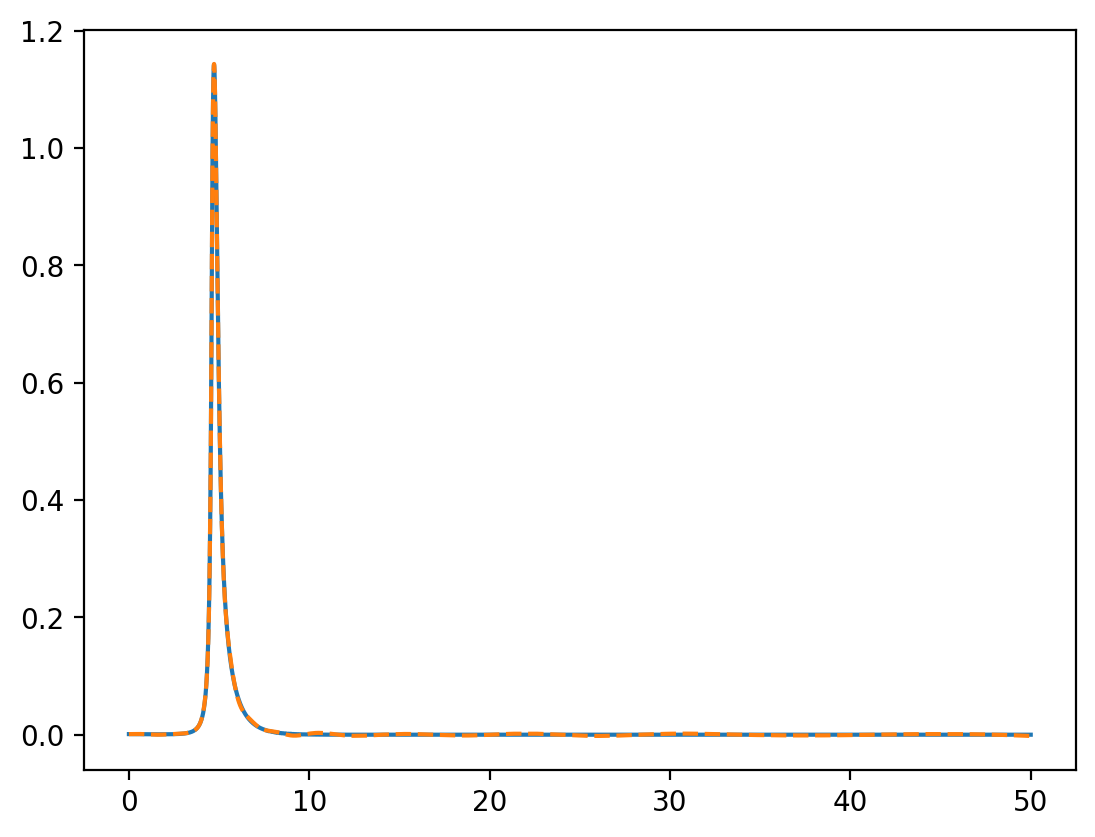

In [52]:
j = 4
plt.figure(dpi=200)
plt.plot(t_train, c_ref[:, j], "-", label="reference")
# plt.plot(t_train, y_train, '.', label="train")
plt.plot(t_train, c_pred[:, j], "--", label="prediction")
# plt.legend()
plt.show()

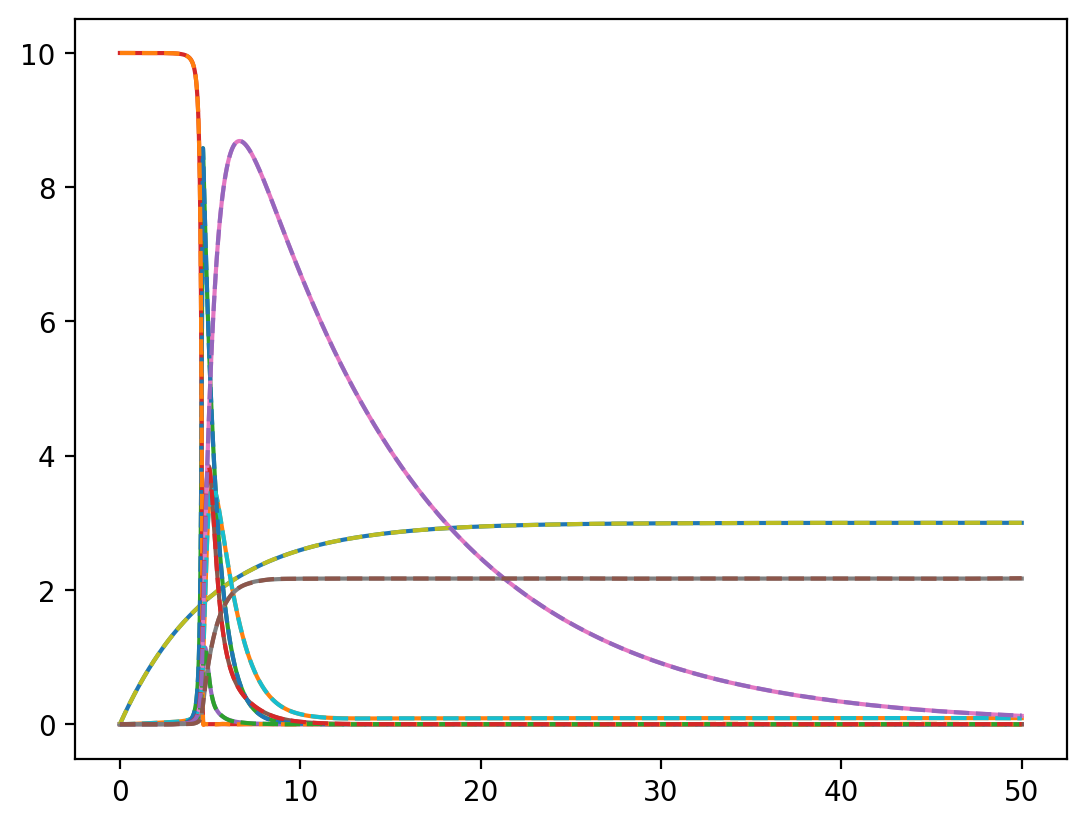

In [53]:
plt.figure(dpi=200)
plt.plot(t_train, c_ref, "-", label="reference")
# plt.plot(t_train, y_train, '.', label="train")
plt.plot(t_train, c_pred, "--", label="prediction")
# plt.legend()
plt.show()

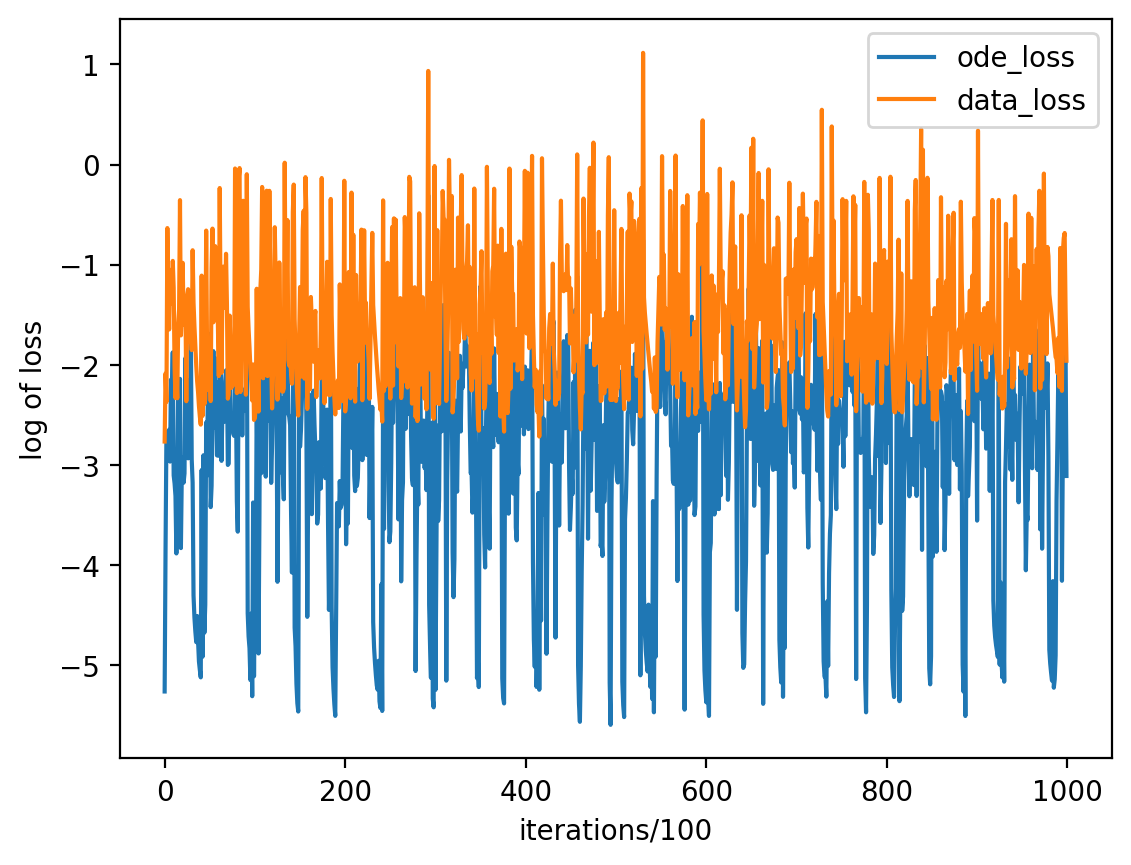

In [54]:
plt.figure(dpi=200)
plt.plot(np.log10(ode_loss)[::100], "-", label="ode_loss")
plt.plot(np.log10(data_loss)[::100], "-", label="data_loss")
# plt.plot(np.log(loss), "-", label="loss")
plt.xlabel('iterations/100')
plt.ylabel('log of loss')
plt.legend()
plt.show()